# Chart Visualization

The examples below assumes that you are using Jupyter

In [1]:
import narwhals as nw
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import csv


In [2]:
data = pl.read_csv('docs/basics/data/population.csv')

def func(df_any):
    df_nw = nw.from_native(df_any)   
    df = df_nw.select(
        a_sum = nw.col('Population (historical estimates)')
    )    

    return nw.to_native(df)
func(data)

a_sum
i64
14737
20405
28253
39120
54166
…
14751101
15052191
15354606


In [3]:
'''
Import the data for the demonstration
'''
data = pl.read_csv('docs/basics/data/population.csv')

country_list = []

with open('docs/basics/data/data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        country_list.append(row[0])


In [4]:
@nw.narwhalify
def filter_rows(df_any):
    df = df_any.rename({"Population (historical estimates)": "Population"})

    is_country = df.with_columns(is_country=nw.col("Entity").is_in(country_list)).filter(nw.col('is_country') & nw.col('Year') > 0)

    return is_country.group_by(['Year']).agg(nw.col('Population').sum().alias('Global Population')).sort('Year')

In [5]:
pd_df = filter_rows(data)

In [6]:
def plot_population_line(df_any):
    df = nw.from_native(df_any)
    plt.figure(figsize=(10, 5), layout = 'constrained', )
    plt.plot(df['Year'], df['Global Population'].to_numpy(), label = 'Population Growth', linewidth=1, marker='o', markersize=2, color='purple')
    plt.ylabel('Global Population in Billions')
    plt.xlabel('Years')
    plt.title('Global Population (1555 - 2021)')
    plt.legend()

    max_population = df['Global Population'].max()
    max_year = df['Year'].max()
    unit = 1000000000

    plt.annotate(f'Max: {max_population/unit:.2f}B', xy=(max_year, max_population), 
                xytext=(-90, -10), textcoords='offset points', ha='left', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))


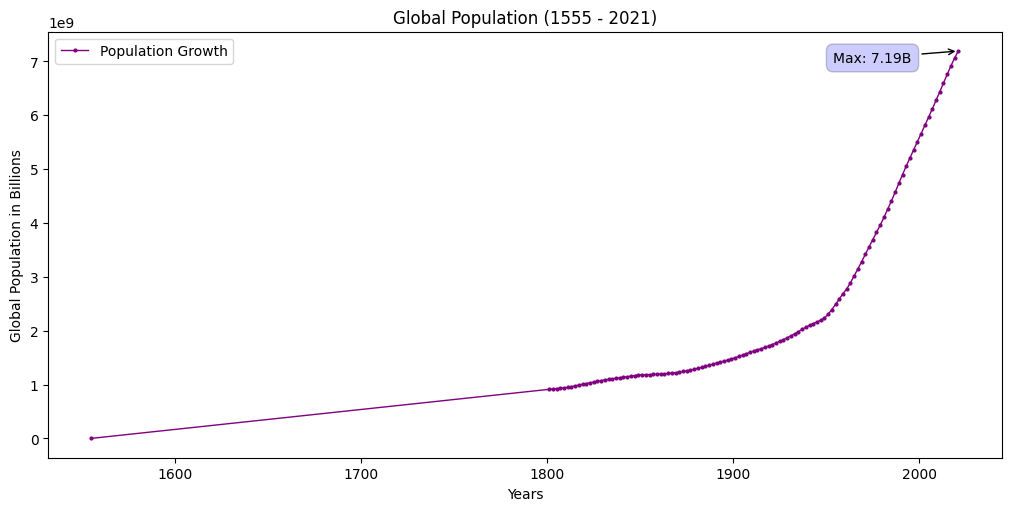

In [7]:
plot_population_line(pd_df)

In [8]:
def plot_population_bar(df_any):
    pass

In [9]:
def func(df_any):
    df = nw.from_native(df_any)
    countries = ('Nigeria', 'United Kingdom', 'United States')
    df = df.rename({"Population (historical estimates)": "Population"})

    is_country = df.with_columns(is_country=nw.col("Entity").is_in(countries)).filter(nw.col('is_country') & nw.col('Year') > 0)

    df = is_country.group_by(['Entity']).agg(nw.col('Population').max().alias('Max Population'),
                                             nw.col('Population').min().alias('Min Population'),
                                             nw.col('Population').std().alias('Std Population'),
                                             nw.col('Population').mean().alias('Mean Population')).sort('Entity')

    return nw.to_native(df)

print(func(data))


shape: (3, 5)
┌────────────────┬────────────────┬────────────────┬────────────────┬─────────────────┐
│ Entity         ┆ Max Population ┆ Min Population ┆ Std Population ┆ Mean Population │
│ ---            ┆ ---            ┆ ---            ┆ ---            ┆ ---             │
│ str            ┆ i64            ┆ i64            ┆ f64            ┆ f64             │
╞════════════════╪════════════════╪════════════════╪════════════════╪═════════════════╡
│ Nigeria        ┆ 213401328      ┆ 12100860       ┆ 4.8671e7       ┆ 4.4358e7        │
│ United Kingdom ┆ 67281040       ┆ 10866183       ┆ 1.5026e7       ┆ 4.1227e7        │
│ United States  ┆ 336997632      ┆ 6113782        ┆ 1.0014e8       ┆ 1.1709e8        │
└────────────────┴────────────────┴────────────────┴────────────────┴─────────────────┘


In [10]:
# def plot_population_bar(df_any):
#     cols = ['Max Population', 'Min Population', 'Std Population', 'Mean Population']
#     df = nw.from_native(df_any)
#     for label in cols:
#         plt.hist(nw.col('Entity') == 'Nigeria'[label], color='green', label='Nigeria', alpha=0.7, density=True)
#         plt.hist(df[df['Entity'] == 'United States'][label], color='blue', label='United States', alpha=0.7, density=True)
#         plt.hist(df[df['Entity'] == 'United Kingdom'][label], color='yellow', label='United Kingdom', alpha=0.7, density=True)
#         plt.legend()
#         plt.show()

# plot_population_bar(func(data))

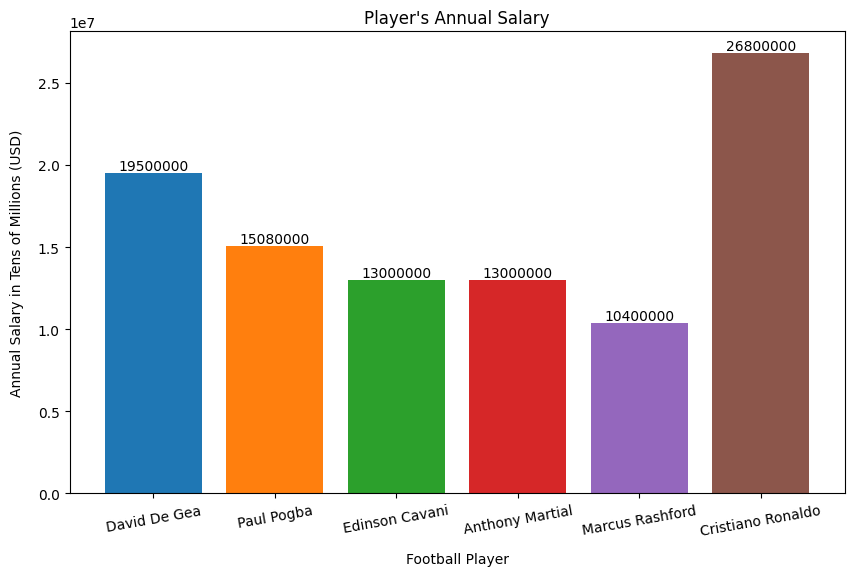

In [56]:
import narwhals as nw
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl

data2 = {'Player': ['David De Gea', 'Paul Pogba', 'Edinson Cavani', 'Anthony Martial', 'Marcus Rashford', 'Cristiano Ronaldo'], 'Annual Salary': [19500000, 15080000, 13000000, 13000000, 10400000, 26800000]}

pd_df = pd.DataFrame(data2)

def plot_bar(df_any):
    df = nw.from_native(df_any)
    y = df['Annual Salary'].to_numpy()
    x = df['Player'].to_numpy()
    

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    plt.bar(x, y, color=colors, width=0.8)

    # Add labels and title
    plt.xlabel('Football Player', labelpad=(10))
    plt.ylabel('Annual Salary in Tens of Millions (USD)', labelpad=(10))
    plt.title("Player's Annual Salary")
    plt.xticks(rotation = 10)

    # Add labels on the bars
    for i in range(len(x)):
            plt.text(i, y[i], y[i], ha = 'center', va = 'bottom')

plot_bar(pd_df)


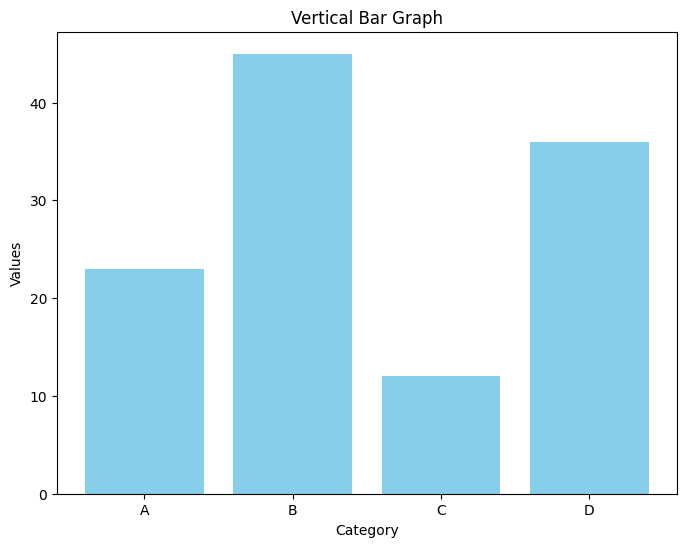

In [21]:
# import matplotlib.pyplot as plt



# # Plot vertical bar graph
# plt.figure(figsize=(8, 6))
# plt.bar(df['Category'], df['Values'], color='skyblue')
# plt.xlabel('Category')
# plt.ylabel('Values')
# plt.title('Vertical Bar Graph')
# plt.show()
